# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [33]:
# Import your libraries
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [45]:
# Your code here
mean=50
sd=5
samples=[10,50,500,5000]
rand_samp=[[np.random.normal(mean,sd,n),n] for n in samples]
for i in range(len(rand_samp)):
    k2,p=stats.normaltest(rand_samp[i][0])
    print('-------------------------------------------------')
    print('')
    print(' >> Number of elements: ',rand_samp[i][1])
    print('')
    print('Chi squared probability: ',p)
    print('')
    testp=p<0.05
    print('Test (<0.05): ',p<0.05)
    print(' >>> ','Normal' if testp==False else 'Not Normal')
    

-------------------------------------------------

 >> Number of elements:  10

Chi squared probability:  0.025401406963505648

Test (<0.05):  True
 >>>  Not Normal
-------------------------------------------------

 >> Number of elements:  50

Chi squared probability:  0.8376625054103752

Test (<0.05):  False
 >>>  Normal
-------------------------------------------------

 >> Number of elements:  500

Chi squared probability:  0.1744069119287954

Test (<0.05):  False
 >>>  Normal
-------------------------------------------------

 >> Number of elements:  5000

Chi squared probability:  0.6356641436039339

Test (<0.05):  False
 >>>  Normal


/home/ivan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


#### Interpret the normaltest results and make your observations.

In [46]:
# Explain the test results here
# All depends on the threshold value we define for our hipothesis to check wherever we do not have a normal
# distribution. 'p' values from the test should be equal or major than this threshold to reject the hipothesis
# Threshold is usually defined as 0.05. So every 'p' value obtained over this threshold reject the hipothesis of
# not a normal distribution

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

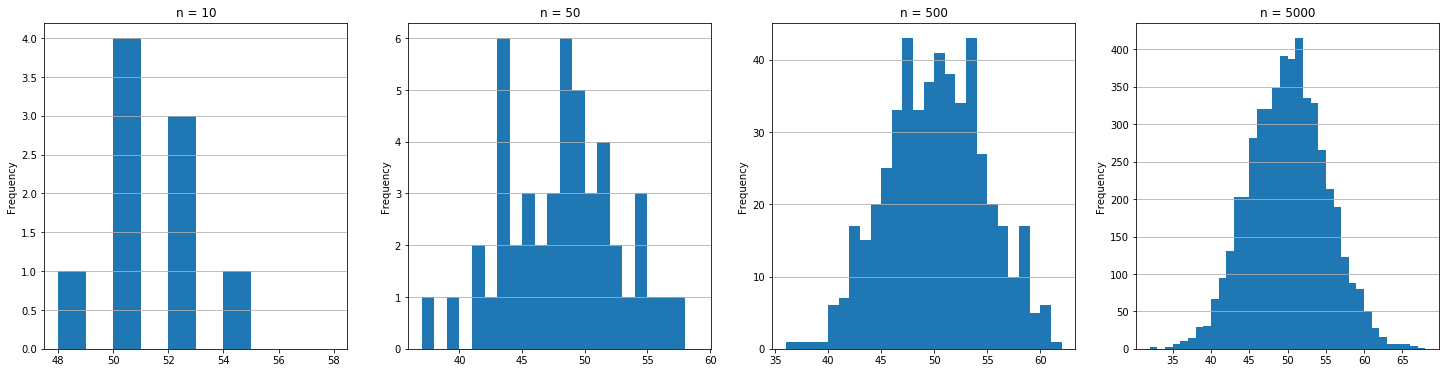

In [56]:
# Your code here
nsubs=len(rand_samp)

fig,axes=plt.subplots(1,nsubs,figsize=(25,6))

counter=-1
for distrib,samp in rand_samp:
    counter+=1
    axes[counter].hist(distrib,bins=np.arange(np.floor(min(distrib)),np.ceil(max(distrib)),1),align='mid')
    axes[counter].set_title('n = %s' %samp)
    axes[counter].yaxis.grid()
    axes[counter].set_ylabel('Frequency')


#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [ ]:
# Your comment and explanation here
# All distributions have the mean on 50 or near it. This fits with central theorem where taking a random sample of elements of a distribution
# its mean values are near the mean, ad when we take more and more samples it returns on getting closer to the defined mean.

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

In [ ]:
# Your code here


#### Explain what you observe from the plot above

In [ ]:
# Your comment here

#### Now plot PMP with 50, 500, and 5000 visitors.

In [ ]:
# Your code here

#### What did you notice from the distribution plots? Comment your findings.

In [ ]:
# Your comment here


# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [ ]:
# Your comment here

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [ ]:
# Your code here

#### What is the probability of getting 60 visits?

In [ ]:
# Your code here

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

In [ ]:
# your code here
